In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv("../cleaned_data/train_data.csv")
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes,Default
0,45,72928,23252,516,72,1,24.53,24,0.79,0,...,1,0,0,0,1,0,0,0,1,0
1,41,65437,15975,328,81,4,19.00,60,0.69,0,...,1,0,0,0,0,1,0,1,0,0
2,34,147083,73467,607,67,1,8.20,36,0.66,0,...,0,1,0,1,0,0,0,0,1,0
3,25,97594,165559,489,115,4,21.12,24,0.21,0,...,0,1,0,0,0,0,1,1,0,0
4,22,143415,197038,424,15,3,12.84,36,0.61,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163416,56,95731,78549,580,53,2,13.39,48,0.54,1,...,1,0,0,0,0,0,1,0,1,0
163417,32,46410,27511,799,57,4,14.20,48,0.41,0,...,0,1,1,0,0,0,0,0,1,0
163418,54,142603,177416,519,20,3,10.69,12,0.47,0,...,1,0,0,0,0,1,0,1,0,0
163419,50,99826,161987,613,61,3,12.31,48,0.56,0,...,0,1,0,0,0,0,1,0,1,0


In [8]:
default = np.array(df["Default"])
df.drop(columns=["Default"], inplace=True)

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 11))

params = {
    "n_neighbors": k_range
}

grid_search = GridSearchCV(knn, params, cv=5, verbose=2)

In [10]:
grid_search.fit(df, default)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=  19.3s
[CV] END ......................................n_neighbors=1; total time=  19.0s
[CV] END ......................................n_neighbors=1; total time=  19.0s
[CV] END ......................................n_neighbors=1; total time=  18.8s
[CV] END ......................................n_neighbors=1; total time=  18.8s
[CV] END ......................................n_neighbors=2; total time=  19.2s
[CV] END ......................................n_neighbors=2; total time=  18.7s
[CV] END ......................................n_neighbors=2; total time=  19.7s
[CV] END ......................................n_neighbors=2; total time=  20.1s
[CV] END ......................................n_neighbors=2; total time=  19.1s
[CV] END ......................................n_neighbors=3; total time=  18.9s
[CV] END ......................................n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

Text(0, 0.5, 'Cross-Validated Accuracy')

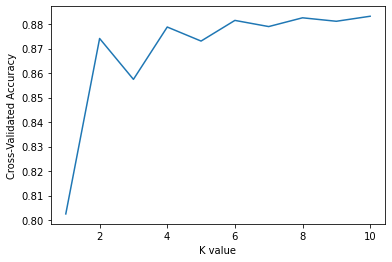

In [11]:
grid_mean_scores = grid_search.cv_results_["mean_test_score"]

plt.plot(k_range, grid_mean_scores)
plt.xlabel("K value")
plt.ylabel("Cross-Validated Accuracy")

In [12]:
model = grid_search.best_estimator_

test_df = pd.read_csv("../cleaned_data/test_data.csv")

y_true = np.array(test_df["Default"])
test_df.drop(columns=["Default"], inplace=True)

y_pred = model.predict(test_df)
accuracy_score(y_true, y_pred)

0.882269434110045

In [13]:
test_df = pd.read_csv("../data/test.csv")

ids = np.array(test_df["LoanID"])
test_df.drop(columns="LoanID", inplace=True)

test_df = pd.get_dummies(test_df, columns = test_df.select_dtypes(include=['object','category']).columns,dtype=int)

In [14]:
submission = []

y_pred = model.predict(test_df)

submission.append(ids)
submission.append(y_pred)

submission = np.array(submission).T
submission = pd.DataFrame(submission)

submission.to_csv("knn_submission.csv", header=["LoanID", "Default"], index=False)